### Unidades de observación 
Las peleas de los diferentes eventos realizados por UFC desde 1994 hasta 2021

### Unidad de análisis
Análitica y descriptiva principalmente, aunque también se busca ver las posibilidades de una unidad predictiva (digamos para crear un modelo predictivo de resultados)
### Justificación de datos
Nuestros datos longitudinales ya que tienen "resultados repetitivos" a lo largo del tiempo  
También porque en varias ocasiones a los sujetos les aplican las mismas mediciones

### clasificación de variables/columnas

FIGHT_ID – Nominal  
EVENT_ID – Nominal  
FIGHT_NAME – Nominal  
FIGHT_WEIGHTCLASS – Nominal  
FIGHT_METHOD – Nominal  
ROUND – Ordinal  
TIME – Intervalo  
FIGHT_TIME_FORMAT – Nominal  
FIGHT_REFEREE – Nominal  
FIGHT_DETAILS – Nominal  
MINUTE - Razón  
SECOND - Razón  
DATE_YMD - Intervalo
EVENT_DATE - Intervalo
FIGHT_STUB, EVENT_NAME, EVENT_LOCATION, EVENT_STUB, URL – Nominal  
FIGHT_WINNER – Nominal 

## Alta - Baja Cardinalidad (Nominales)

FIGHT - Alta

EVENT - Alta 

FightWeight - Baja

FightMethod - Alta

FightTimeFormat - Baja

Fight_Referee - Baja

Fight_Details - Alta

Fight_Winner - Alta

FIGHT_STUB EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Alta 

FIGHT_WINNER – Alta

## Categoricos balanceados
Round

## Categoricos no balanceados
FIGHT_ID   
EVENT_ID 
FIGHT_NAME
FIGHT_WEIGHTCLASS 
FIGHT_METHOD  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL 
FIGHT_WINNER 

## Division de variables

Juan pedro

Horacio: Analisis univariado de EVENT_DATE, EVENT_LOCATION, FIGHT_WINNER

Yaotecatl
    ROUND - FIGHT_TIME_FORMAT  
    FIGHT_METHOD - FIGHT_WINNER  
    FIGHT_REFEREEE - FIGHT_WINNER
    FIGHT_WINNER - EVENT_LOCATION


In [54]:
#Importacion de librerias
import numpy as np
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik 
from phik import resources, report
import datetime
from datetime import datetime, timedelta, date
from ipywidgets import interact
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!jupyter nbextension enable --py widgetsnbextension

'2.0.3'

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


### Cargamos el dataset resultante del univariado

In [3]:
df = pd.read_csv('ufc_stats_after_univariado.csv',encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIGHT_ID           6662 non-null   int64 
 1   EVENT_ID           6662 non-null   int64 
 2   FIGHT_NAME         6662 non-null   object
 3   FIGHT_WEIGHTCLASS  6662 non-null   object
 4   FIGHT_METHOD       6662 non-null   object
 5   ROUND              6662 non-null   int64 
 6   TIME               6662 non-null   int64 
 7   FIGHT_TIME_FORMAT  6662 non-null   object
 8   FIGHT_REFEREE      6662 non-null   object
 9   FIGHT_DETAILS      6662 non-null   object
 10  MINUTE             6662 non-null   int64 
 11  SECOND             6662 non-null   int64 
 12  FIGHT_STUB         6662 non-null   object
 13  EVENT_NAME         6662 non-null   object
 14  EVENT_DATE         6662 non-null   object
 15  EVENT_LOCATION     6662 non-null   object
 16  EVENT_STUB         6662 non-null   object


In [62]:
nominales = ['FIGHT_ID', 'EVENT_ID', 'FIGHT_NAME','FIGHT_METHOD','FIGHT_DETAILS','FIGHT_STUB','EVENT_NAME','EVENT_LOCATION','EVENT_STUB','URL','FIGHT_WINNER']
nominales_baja_cardinalidad = ['FIGHT_WEIGHTCLASS', 'FIGHT_TIME_FORMAT', 'FIGHT_REFEREE', 'GENDER']
ordinales = ['ROUND'] 
intervalo = ['TIME','EVENT_DATE','DATE_YMD']
razon = ['MINUTE', 'SECOND']

### Analisis de correlación

In [69]:
#Convertimos las cadenas de texto a datos numericos para poder trabajar con ellos
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

label_encoder = LabelEncoder()

fight_winner_dummy = df.copy()

for i in (nominales + nominales_baja_cardinalidad):
    fight_winner_dummy[i] = label_encoder.fit_transform(fight_winner_dummy[i])

corr,p_value = pearsonr(fight_winner_dummy['SECOND'], fight_winner_dummy['FIGHT_METHOD'])
print("Correlación entre las variables: ", corr)
print("Valor p:", p_value)
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("La correlación es estadísticamente significativa.")
else:
    print("La correlación no es estadísticamente significativa.")

Correlación entre las variables:  0.5253822485615317
Valor p: 0.0
La correlación es estadísticamente significativa.


<Axes: >

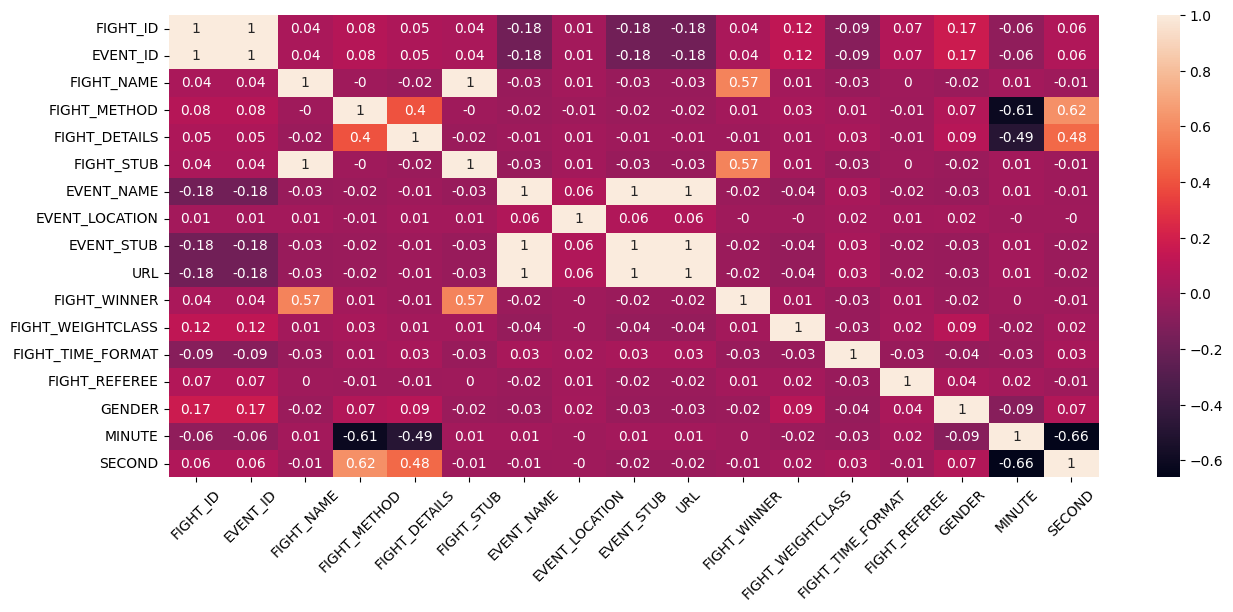

In [68]:
corrKendall = fight_winner_dummy[nominales + nominales_baja_cardinalidad + razon].corr(method='kendall')  

fig,ax = plt.subplots(figsize=(15,6))
sns.heatmap(corrKendall.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()

In [73]:
sigm = fight_winner_dummy.significance_matrix(interval_cols=razon)
sigm

c:\Users\luffy\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable FIGHT_ID is large: 6662. Are you sure this is not an interval variable? Analysis for pairs of variables including FIGHT_ID can be slow.
  warnings.warn(
c:\Users\luffy\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable FIGHT_NAME is large: 6564. Are you sure this is not an interval variable? Analysis for pairs of variables including FIGHT_NAME can be slow.
  warnings.warn(
c:\Users\luffy\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable FIGHT_STUB is large: 6564. Are you sure this is not an interval variable? Analysis for pairs of variables including FIGHT_STUB can be slow.
  warnings.warn(
c:\Users\luffy\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\da

KeyboardInterrupt: 

<Axes: >

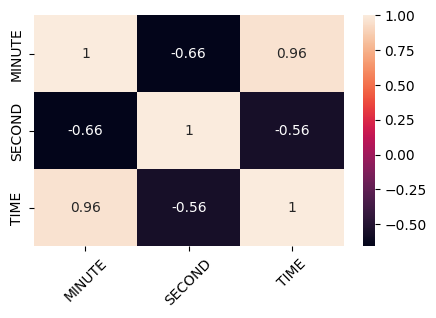

In [ ]:
corrKendall = df[['MINUTE', 'SECOND','TIME']].corr(method='kendall')  

fig,ax = plt.subplots(figsize=(5,3))
sns.heatmap(corrKendall.round(2),annot=True)
plt.tick_params(axis='x', rotation=45)
plt.show()